Shape: torch.Size([1, 240, 240, 155]), Selected slice index: 127


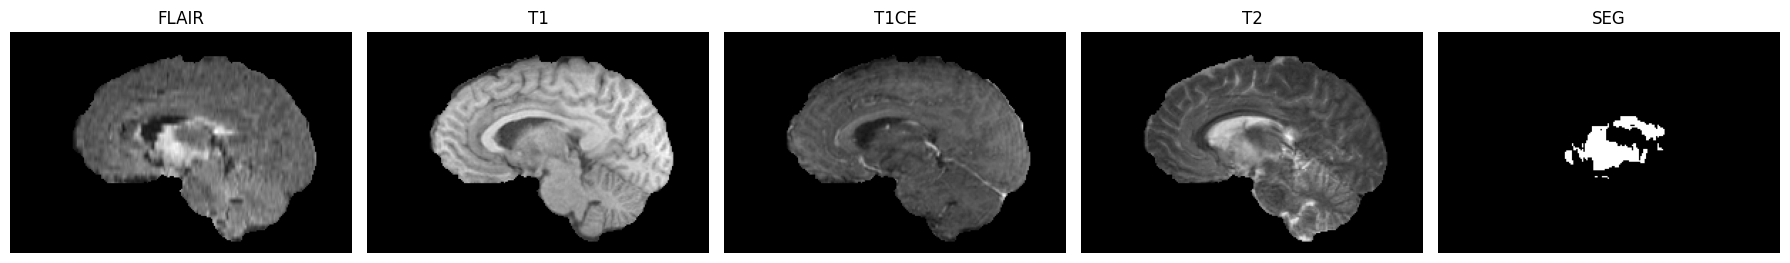

In [5]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os

def load_tensor(file_path):
    """ .pth 파일로부터 텐서를 로드하는 함수 """
    data = torch.load(file_path)
    return data

def rotate_and_visualize_slices(tensors, slice_index):
    """ 텐서 데이터의 주어진 슬라이스를 회전시키고 가로로 배열하여 시각화하는 함수 """
    fig, axes = plt.subplots(1, len(tensors), figsize=(18, 10))
    for i, (scan_type, tensor) in enumerate(tensors.items()):
        slice_data = tensor[0, slice_index, :, :].cpu().numpy()
        rotated_slice = np.rot90(slice_data)
        ax = axes[i]
        im = ax.imshow(rotated_slice, cmap='gray')
        ax.title.set_text(scan_type.upper())
        ax.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_patient_slices(patient_id, base_dir):
    """ 환자 ID에 따라 저장된 모든 MRI 시퀀스의 지정된 슬라이스를 회전시켜 시각화 """
    file_path = os.path.join(base_dir, f'{patient_id}_tensors.pth')
    tensors = load_tensor(file_path)
    num_slices = tensors['flair'].shape[1]

    black_areas = [torch.sum(tensors['flair'][0, i, :, :] < 0.5).item() for i in range(num_slices)]
    best_slice = np.argmin(black_areas)  

    print(f"Shape: {tensors['flair'].shape}, Selected slice index: {best_slice}")
    rotate_and_visualize_slices(tensors, best_slice)

patient_id = 'BraTS20_Training_001'
base_dir = '../../../mnt/sda/suhohan/BraTS2020/preprocessed_tensors_train'
visualize_patient_slices(patient_id, base_dir)
